In [1]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('./bin')
import PolA_A_allpars
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

mpl.rcParams['font.size']=12
from multiplesites_eqbinding_polcycle import avb_1sites, avb_2sites, avb_3sites, avb_3sites_nologsumexp,avb_4sites, avb_5sites, avb_6sites, foldchange_from_avbinding_ratesdirectly_Hill

instance=PolA_A_allpars.GRFCalculations_100_100_15()
othervars=np.array([0])

In [2]:
def fmultiple(a,pars_noKx):
    #a is the equilibrium average binding, can be used for 1 or multiple sites
    #for more flexibility in which rates to affect, use foldchange_from_avbinding_ratesdirectly_Hill
    k1,k20,k30,k4,s2,n2,k2sat,s3,n3,k3sat=pars_noKx
    Hill2=(a**n2)/(s2**n2+a**n2)
    k2=k20+(k2sat-k20)*Hill2
    Hill3=(a**n3)/(s3**n3+a**n3)
    k3=k30+(k3sat-k30)*Hill3
    m=k3*(k1*k2)/(k2*k3+k3*k4+k1*k3+k1*k2)
    return [m, a, k2, k3]

def plot_parset(pars,title=None,ax=None,color="k",figname=None,xrange=None,xticks=None):
    Arange=np.logspace(xrange[0],xrange[1],100)
    instance.fill_num_den(pars,othervars)
    m0=instance.interfaceGRF(0)
    print(m0)
    out=np.zeros(len(Arange))
    for a,A in enumerate(Arange):
        #m=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars.copy(),np.array([0]),A)
        m=instance.interfaceGRF(A)
        out[a]=m/m0
        
    max_=max(out)
    min_=min(out)
    print("range of response is (max_/min_):", max_/min_, "min:", min_, "max:", max_)
    #ax=plt.subplots(1,1,figsize=(6,4))
    if ax is None:
        fig,ax=plt.subplots(1,1,figsize=(1.8,1.5))
        show=True
    else:
        show=False
    ax.plot(Arange,out,color=color)
    ax.set_xscale("log")
    ax.set_xlabel(r"$x$",size=10)
    #if k==0:
    ax.set_ylabel('F(x)',size=10)
    ax.axhline(y=1,linestyle="--",color="gray")
    ax.spines[['right', 'top']].set_visible(False)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4, min_n_ticks=3))

    if xticks:
        ax.set_xticks(xticks)
        ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    if title is not None:
         ax.set_title(title)
    if figname is not None:
        plt.tight_layout()
        plt.savefig(figname,bbox_inches="tight")
    if show:
        plt.tight_layout()
        plt.show()
        return 
    else:
        return ax
    
def plot_parset_ku(pars_,title=None,ax=None,color="k",A=1,figname=None,bTrange=None,xticks=None):
    kuvals=np.logspace(bTrange[0],bTrange[1],100)
    out=[]
    for b, ku in enumerate(kuvals):
        binding=[kb,ku]*6

        parslist=pars_+binding
        pars=np.array(parslist)
        instance.fill_num_den(pars,othervars)
        m0=instance.interfaceGRF(0)
        mA=instance.interfaceGRF(A)
        out.append(mA/m0)
    
    if ax is None:
        fig,ax=plt.subplots(1,1,figsize=(1.8,1.5))
        show=True
    else:
        show=False
    ax.plot(kuvals,out,color=color)
    ax.set_xscale("log")
    ax.set_xlabel(r"$b_T$",size=10)
    #if k==0:
    ax.set_ylabel('F(x)',size=10)
    ax.axhline(y=1,linestyle="--",color="gray")
    ax.spines[['right', 'top']].set_visible(False)

    if xticks:
        ax.set_xticks(xticks)
        ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    if title is not None:
         ax.set_title(title)
    if figname is not None:
        plt.tight_layout()
        plt.savefig(figname,bbox_inches="tight")
    if show:
        plt.tight_layout()
        plt.show()
        return 
    else:
        return ax

In [3]:
figsfolder="./figscode"

In [4]:
10**(0.5)

3.1622776601683795

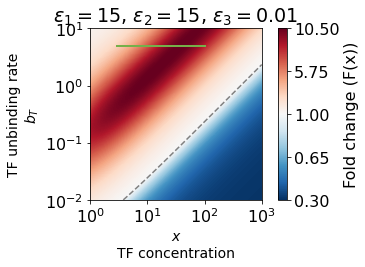

ku=5
0.0016
range of response is (max_/min_): 3.231506767156308 min: 3.2543219369495366 max: 10.516363361757652


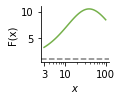

In [50]:
#Fig 3C
mpl.rcParams["font.size"]=16
ktni0=0.01 #k1
ktin0=1 #k4
ktia0=0.2 #k2
ktan0=0.05 #k3


ktinA=ktin0
ktniA=ktni0*15
ktiaA=ktia0*15
ktanA=ktan0*0.01
kb=0.1
xvals=np.logspace(0,3,200)
kuvals=np.logspace(-2,1,200)
out=np.zeros((len(kuvals), len(xvals)))

#bxlist=[np.log10(7),np.log10(1),np.log10(0.03)] #line at each of these three unbinding rates, as a function of concentration
kulist=[10**0.9,5,10**(-1.5)] #line at each of these three unbinding rates, as a function of concentration
xlist=[1,2,2.9] #line at each of these three concentrations, as a function of unbinding rates

xlplot=[np.log10(3),np.log10(100)]
xticks_conc=[3,10,100]
bTlplot=[-0.5,0.5]
xticks_bT=[np.round(10**bTlplot[0],1),1,np.round(10**bTlplot[1])]
xlist=[0.5,1.1,2.5]
colors_bx=["#3d6020ff","#75b04aff","#3df4b3ff"]
#colors_x=["#870007ff","#ff7116ff","#ffb116ff"]
colors_x=["#494eadff","#a484e5ff","#a474e5ff"]

for b, ku in enumerate(kuvals):
    binding=[kb,ku]*6

    parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
    pars=np.array(parslist)
    instance.fill_num_den(pars,othervars)
    m0=instance.interfaceGRF(0)
    #print(m0)
    
    for x_,x in enumerate(xvals):
        #m=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars.copy(),np.array([0]),A)
        m=instance.interfaceGRF(x)
        out[b,x_]=m/m0



for fignum in range(1):
    fig,ax=plt.subplots(1,1,figsize=(6,4)) 
    #ar=np.ma.masked_array(out,mask=out<1)
    min_val_rounded=np.round(out.min(),1) #round minimum value to 1 decimal
    max_val_rounded=np.round(out.max(),1) #round max value to 1 decimal
    if out.min()<1:
        norm=mpl.colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
        cmap=plt.cm.RdBu_r
    else:
        norm=None
        cmap=plt.cm.Blues
    extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(kuvals[0]),np.log10(kuvals[-1])]
    im=ax.imshow(out,origin="lower",norm=norm,cmap=cmap,extent=extent)
    ax.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
    ax.set_yticks([-2,-1,0,1])
    ax.set_yticklabels([r"$10^{-2}$",r"$10^{-1}$",r"$10^0$",r"$10^1$"])
    if fignum<0:
        kulist_=[kulist[0],kulist[-1]]
    else:
        kulist_=kulist
    for k_,ku in enumerate(kulist_):
        if k_==1:
    #    print(bG)
            ax.plot(xlplot,[np.log10(ku),np.log10(ku)],linestyle="-",color=colors_bx[k_],linewidth=2)
    #if fignum>1:
    #for x_,x in enumerate(xlist):
    #        ax.plot([x,x],bTlplot,linestyle="-",color=colors_x[x_],linewidth=2)
    #ax.plot([1,1],[-1,1],linestyle=":",color="k")
        #ax.axhline(y=np.log10(bG),)
    #ax.set_xscale('log')
    ax.set_ylabel("TF unbinding rate\n"+r"$b_T$",size=14)
    ax.set_xlabel(r"$x$"+"\nTF concentration",size=14)
    ax.set_title(r"$\epsilon_1=%g$, $\epsilon_2=%g$, $\epsilon_3=%g$"%(ktniA/ktni0, ktiaA/ktia0, ktanA/ktan0))
    
    below_one=np.linspace(min_val_rounded,1,3)
    above_one=np.linspace(1,max_val_rounded,3)
    bounds=np.concatenate((below_one,above_one[1:]))
    plt.colorbar(im,ax=ax,ticks=bounds,label="Fold change (F(x))")
    #ax.axhline(y=1,linestyle="--",color="gray")
    #if title is not None:
    #    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(os.path.join(figsfolder,"Fig4colormap_r_%d.svg"%fignum))
    plt.show()
    mpl.rcParams["font.size"]=10
    fignames=["Fig4C_d.svg","Fig4C_m.svg","Fig4C_u.svg"]
    for b,ku in enumerate(kulist):
        if b==1:
            print("ku=%g"%ku)
            binding=[kb,ku]*6

            parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
            pars=np.array(parslist)
            plot_parset(pars,title=None,color=colors_bx[b],figname=os.path.join(figsfolder,fignames[b]),xrange=xlplot,xticks=xticks_conc) #os.path.join(figsfolder,fignames[b]))

    #fignames=["Fig4Cku_d.svg","Fig4Cku_m.svg","Fig4Cku_u.svg"]
    #for x_,x in enumerate(xlist):
    #    print("x=%g"%(10**x))
    #    parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]
    #    plot_parset_ku(parslist,title=None,color=colors_x[x_],A=10**x,bTrange=bTlplot,figname=os.path.join(figsfolder,fignames[x_]),xticks=xticks_bT) #os.path.join(figsfolder,fignames[x_]))


In [5]:
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [6]:
def is_unimodal_with_peak(row,n=100):
    peak_idx = np.argmax(row)
    if peak_idx>n-30 or peak_idx<30:
        valid=False
    else:
        before_peak = row[:peak_idx]
        after_peak = row[peak_idx+1:]

        is_increasing = np.all(np.diff(before_peak) > 0)
        is_decreasing = np.all(np.diff(after_peak) < 0)
        valid=is_increasing and is_decreasing

    return valid , peak_idx


In [7]:
def calculate_out(basalparset,kb,kuvals=None,xvals=None):
    out=np.zeros((len(kuvals), len(xvals)))
    
    for b, ku in enumerate(kuvals):
        binding=[kb,ku]*6

        parslist=basalparset+binding
        pars=np.array(parslist)
        instance.fill_num_den(pars,othervars)
        m0=instance.interfaceGRF(0)
        #print(m0)

        for x_,x in enumerate(xvals):
            #m=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars.copy(),np.array([0]),A)
            m=instance.interfaceGRF(x)
            out[b,x_]=m/m0
    
    return out

In [8]:
xvals=np.logspace(0,2,100)
kuvals=np.logspace(-2,1,100)
nrows=len(xvals)

In [135]:
#Sample parameters:



dynamic_ranges_23=[]
parameters_23=[]
D1list=[]
D2list=[]
min1list=[]
min2list=[]
np.random.seed(1)
k=0
j=0
while k<50000:
#for i in range(10000):
    kb=10**np.random.uniform(-2,1)
    ktni0,ktin0,ktia0,ktan0=10**np.random.uniform(-2,1,size=4)
    epsilon2=10**np.random.uniform(-2,2)
    epsilon3=10**np.random.uniform(-2,2)
    #ensure incoherence
    if (epsilon2>1 and epsilon3>1) or (epsilon2<1 and epsilon3<1):
        pass
    else: 
        k+=1

        ktinA=ktin0
        ktniA=ktni0
        ktiaA=ktia0*epsilon2
        ktanA=ktan0*epsilon3
        basalparset=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]
        out=calculate_out(basalparset,kb,kuvals=kuvals,xvals=xvals)


        # Check all rows

        Dlist=[]
        D1list_=[]
        D2list_=[]
        min1list_=[]
        min2list_=[]
        for i, row in enumerate(out):
            valid, peak = is_unimodal_with_peak(row,n=nrows)
            if valid:
                min_=row[0]
                max_=row[peak]
                min_2=row[-1]
                D1=max_/min_
                D2=max_/min_2
                Dlist.append(D1+D2)
                D1list_.append(D1)
                D2list_.append(D2)
                min1list_.append(min_)
                min2list_.append(min_2)
        if len(Dlist)>0:
            j+=1
            argmax=np.argmax(Dlist)
            dynamic_ranges_23.append(Dlist[argmax])
            parameters_23.append([kb,ktni0,ktin0,ktia0,ktan0,epsilon2,epsilon3])
            D1list.append(D1list_[argmax])
            D2list.append(D2list_[argmax])
            min1list.append(min1list_[argmax])
            min2list.append(min2list_[argmax])
            
    

In [136]:
print(k,"parameter sets tested", j, "functions")
parsets=np.array(parameters_23)
n=len(parsets)
D1list=np.array(D1list).reshape(n,1)
D2list=np.array(D2list).reshape(n,1)
min1list=np.array(min1list).reshape(n,1)
min2list=np.array(min2list).reshape(n,1)
data=np.concatenate((parsets,D1list,D2list,min1list,min2list),axis=1)
df=pd.DataFrame(data=data,columns=["kb","ktni0","ktin0","ktia0","ktan0","epsilon2","epsilon3","D1","D2","min1","min2"])
df.to_csv("2025_05_df_23.csv.gz",index=False,compression="gzip")

50000 parameter sets tested 17702 functions


In [32]:
def plot_parset_heatmap_and_line(parameterset,ax_line=None,case="23"):
    xlplot=[0,np.log10(100)]
    xticks_conc=[1,10,100]
    
    if case=="23":
    
        kb,ktni0,ktin0,ktia0,ktan0,epsilon2,epsilon3=parameterset
        epsilon1=1
    elif case=="123":
        kb,ktni0,ktin0,ktia0,ktan0,epsilon1,epsilon2,epsilon3=parameterset
    ktinA=ktin0
    ktniA=ktni0*epsilon1
    ktiaA=ktia0*epsilon2
    ktanA=ktan0*epsilon3
    basalparset=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]

    out=calculate_out(basalparset,kb,kuvals=kuvals,xvals=xvals)

    fig,ax=plt.subplots(1,1,figsize=(6,4)) 
    #ar=np.ma.masked_array(out,mask=out<1)
    min_val_rounded=np.round(out.min(),1) #round minimum value to 1 decimal
    max_val_rounded=np.round(out.max(),1) #round max value to 1 decimal
    print(min_val_rounded,max_val_rounded)
    if out.min()<1:
        norm=mpl.colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
        cmap=plt.cm.RdBu_r
    else:
        norm=None
        cmap=plt.cm.Blues
    extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(kuvals[0]),np.log10(kuvals[-1])]
    im=ax.imshow(out,origin="lower",norm=norm,cmap=cmap,extent=extent)
    ax.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
    ax.set_yticks([-2,-1,0,1])
    ax.set_yticklabels([r"$10^{-2}$",r"$10^{-1}$",r"$10^0$",r"$10^1$"])
    below_one=np.linspace(min_val_rounded,1,3)
    above_one=np.linspace(1,max_val_rounded,3)
    bounds=np.concatenate((below_one,above_one[1:]))
    plt.colorbar(im,ax=ax,ticks=bounds,label="Fold change (F(x))")
    fig.show()


    Dlist=[]
    idxs=[]
    for i, row in enumerate(out):
        valid, peak = is_unimodal_with_peak(row)
        if valid:
            min_=row[0]
            max_=row[peak]
            min_2=row[-1]
            D1=max_/min_
            D2=max_/min_2
            Dlist.append(D1+D2)
            idxs.append(i)
    argmax=np.argmax(Dlist)
    i=idxs[argmax]

    ax.axhline(y=np.log10(kuvals[i]),linestyle="--",color="green")

    ku=kuvals[i]
    binding=[kb,ku]*6

    parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
    pars=np.array(parslist)

    plot_parset(pars,title=None,color="k",figname=None,xrange=xlplot,xticks=xticks_conc,ax=ax_line) #os.path.join(figsfolder,fignames[b]))
    return ax_line

In [10]:
df=pd.read_csv("2025_05_df_23.csv.gz",compression="gzip")
df.head()

,kb,ktni0,ktin0,ktia0,ktan0,epsilon2,epsilon3,D1,D2,min1,min2
0,0.012083,1.026603,0.178614,0.474318,0.026373,0.062002,15.957993,2.069970,1.252360,1.242632,2.053890
1,0.527658,0.027554,0.586026,1.256826,0.020277,0.453131,5.992398,1.255110,1.049125,1.098452,1.314121
2,1.377105,0.477695,0.010906,0.016441,7.976805,1.872414,0.065039,1.065570,1.000600,1.625342,1.730877
3,1.721882,1.017885,0.062339,0.015813,0.128900,3.302707,0.069294,1.175386,2.144320,1.384289,0.758783
4,0.200000,2.642905,0.088254,4.771623,0.541467,0.054455,14.181329,1.703127,1.239982,1.137741,1.562697


6.8 34.0
0.00034129154888600676
range of response is (max_/min_): 2.6604524994047942 min: 12.797825773179229 max: 34.04800756520177
5.4 21.1
0.0012094440512860915
range of response is (max_/min_): 3.3699828380795873 min: 6.274693220249357 max: 21.14560846645467
1.8 22.1
0.00997122393192437
range of response is (max_/min_): 5.125743304645964 min: 4.161509292834633 max: 21.330828394969082


/var/folders/5n/cb1vqrr16p397362xt81k93c0000gn/T/ipykernel_52703/57216615.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


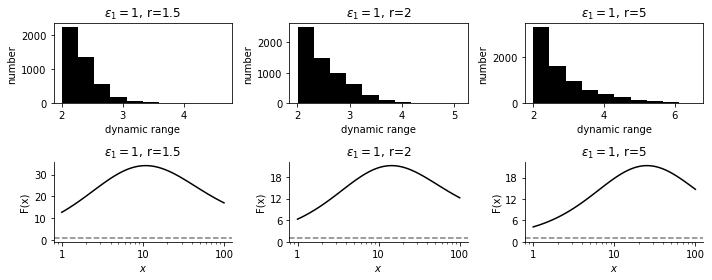

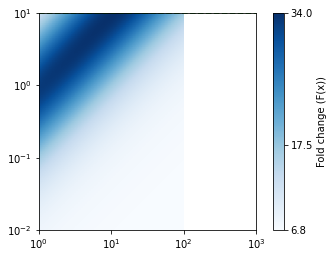

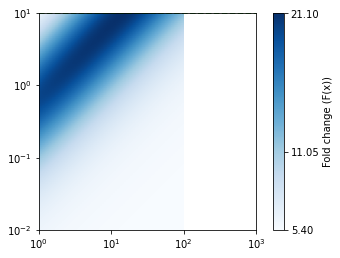

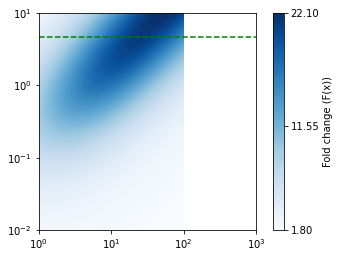

a total of 17998 responses considered


In [21]:
n_=0
fig,axes=plt.subplots(2,3,figsize=(10,4))
for r,ratio in enumerate([1.5,2,5]):
    division=df["D1"].values/df["D2"].values
    mask=(division>1) & (division<ratio)
    ax=axes[0][r]
    subdf=df[mask]
    dynamic_ranges=subdf["D1"]+subdf["D2"]
    argmax=np.argmax(dynamic_ranges)
    parameterset=subdf.iloc[argmax].values[0:7]
    n_+=len(dynamic_ranges)
    
    ax.hist(dynamic_ranges,color="k")
    ax.set_xlabel("dynamic range")
    ax.set_ylabel("number")
    ax.set_title("$\epsilon_1 = 1$, r=%g"%ratio)
    ax=axes[1][r]
    ax.set_title("$\epsilon_1 = 1$, r=%g"%ratio)
    plot_parset_heatmap_and_line(parameterset,ax_line=ax,case="23")
fig.tight_layout()
plt.show()
print("a total of %d responses considered"%n_)

In [157]:
#now allowing also epsilon1

#Sample parameters:
xvals=np.logspace(0,2,100)
nrows=len(xvals)

ratio=1.5
dynamic_ranges_123=[]
parameters_123=[]
k=0
j=0
D1list=[]
D2list=[]
min1list=[]
min2list=[]
while k<50000:
    kb=10**np.random.uniform(-2,1)
    ktni0,ktin0,ktia0,ktan0=10**np.random.uniform(-2,1,size=4)
    epsilon1=10**np.random.uniform(-2,2)
    epsilon2=10**np.random.uniform(-2,2)
    epsilon3=10**np.random.uniform(-2,2)
    #ensure incoherence
    if (epsilon1>1 and epsilon2>1 and epsilon3>1) or (epsilon1<1 and epsilon2<1 and epsilon3<1):
        pass
    else:
        k+=1
        

        ktinA=ktin0
        ktniA=ktni0*epsilon1
        ktiaA=ktia0*epsilon2
        ktanA=ktan0*epsilon3
        
        basalparset=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]

        out=calculate_out(basalparset,kb,kuvals=kuvals,xvals=xvals)
        
        Dlist=[]
        D1list_=[]
        D2list_=[]
        min1list_=[]
        min2list_=[]
        for i, row in enumerate(out):
            valid, peak = is_unimodal_with_peak(row,n=nrows)
            if valid:
                min_=row[0]
                max_=row[peak]
                min_2=row[-1]
                D1=max_/min_
                D2=max_/min_2
                Dlist.append(D1+D2)
                D1list_.append(D1)
                D2list_.append(D2)
                min1list_.append(min_)
                min2list_.append(min_2)
        if len(Dlist)>0:
            j+=1
            argmax=np.argmax(Dlist)
            dynamic_ranges_123.append(Dlist[argmax])
            parameters_123.append([kb,ktni0,ktin0,ktia0,ktan0,epsilon1,epsilon2,epsilon3])
            D1list.append(D1list_[argmax])
            D2list.append(D2list_[argmax])
            min1list.append(min1list_[argmax])
            min2list.append(min2list_[argmax])

        

In [158]:
print(k,"parameter sets tested", j, "functions")
parsets=np.array(parameters_123)
n=len(parsets)
D1list=np.array(D1list).reshape(n,1)
D2list=np.array(D2list).reshape(n,1)
min1list=np.array(min1list).reshape(n,1)
min2list=np.array(min2list).reshape(n,1)
data=np.concatenate((parsets,D1list,D2list,min1list,min2list),axis=1)
df=pd.DataFrame(data=data,columns=["kb","ktni0","ktin0","ktia0","ktan0","epsilon1","epsilon2","epsilon3","D1","D2","min1","min2"])
df.to_csv("2025_05_df_123.csv.gz",index=False,compression="gzip")

50000 parameter sets tested 20562 functions


3.0 22.5
0.0001295339952979555
range of response is (max_/min_): 2.8897157139521044 min: 7.3071256523184145 max: 21.115515821327044
14.6 117.4
8.232367533615602e-05
range of response is (max_/min_): 4.446480518215168 min: 24.731128848977054 max: 109.96648262044559
7.6 258.6
0.0006102394725591978
range of response is (max_/min_): 7.328142060090734 min: 33.58093217957688 max: 246.08584152221172


/var/folders/5n/cb1vqrr16p397362xt81k93c0000gn/T/ipykernel_77737/57216615.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


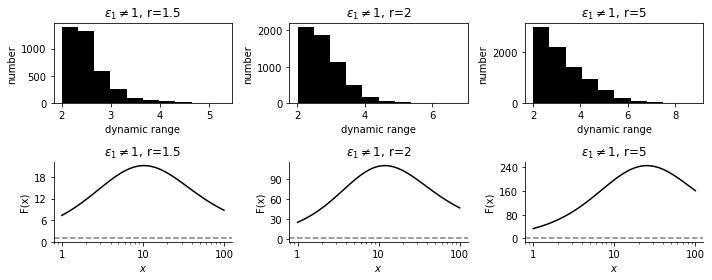

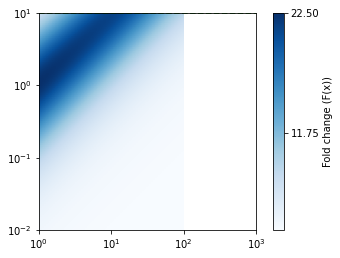

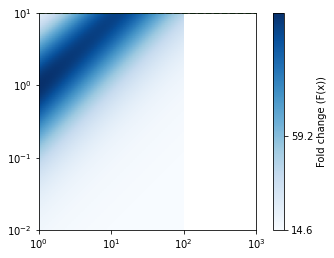

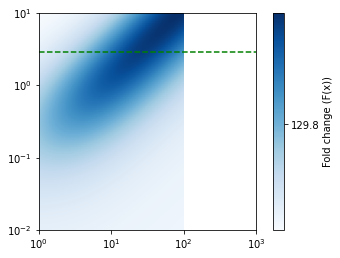

In [166]:
df=pd.read_csv("2025_05_df_123.csv.gz",compression="gzip")
fig,axes=plt.subplots(2,3,figsize=(10,4))
for r,ratio in enumerate([1.5,2,5]):
    division=df["D1"].values/df["D2"].values
    mask=(division>1) & (division<ratio)
    ax=axes[0][r]
    subdf=df[mask]
    dynamic_ranges=subdf["D1"]+subdf["D2"]
    argmax=np.argmax(dynamic_ranges)
    parameterset=subdf.iloc[argmax].values[0:8]
    
    ax.hist(dynamic_ranges,color="k")
    ax.set_xlabel("dynamic range")
    ax.set_ylabel("number")
    ax.set_title(r"$\epsilon_1 \neq 1$, r=%g"%ratio)
    ax=axes[1][r]
    ax.set_title(r"$\epsilon_1 \neq 1$, r=%g"%ratio)
    plot_parset_heatmap_and_line(parameterset,ax_line=ax,case="123")
fig.tight_layout()
plt.show()

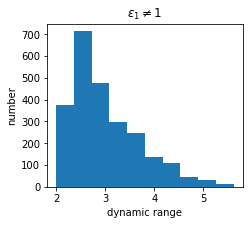

In [56]:
fig,ax=plt.subplots(1,1,figsize=(3.5,3))
ax.hist(dynamic_ranges_123)
ax.set_xlabel("dynamic range")
ax.set_ylabel("number")
ax.set_title(r"$\epsilon_1 \neq 1$")
plt.show()

0.0013867954124117934
range of response is (max_/min_): 3.3650076742465553 min: 13.181840286898613 max: 44.356993726106246


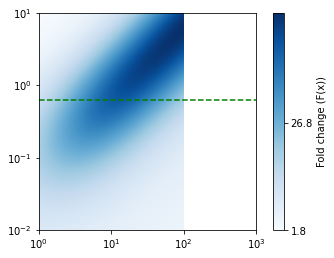

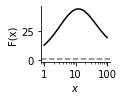

<Figure size 432x288 with 0 Axes>

In [57]:
xlplot=[0,np.log10(100)]
xticks_conc=[1,10,100]

argmax=np.argmax(dynamic_ranges_123)
parameterset=parameters_123[argmax]
kb,ktni0,ktin0,ktia0,ktan0,epsilon1,epsilon2,epsilon3=parameterset
ktinA=ktin0
ktniA=ktni0*epsilon1
ktiaA=ktia0*epsilon2
ktanA=ktan0*epsilon3

basalparset=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]
out=calculate_out(basalparset,kb,kuvals=kuvals,xvals=xvals)
        
fig,ax=plt.subplots(1,1,figsize=(6,4)) 
#ar=np.ma.masked_array(out,mask=out<1)
min_val_rounded=np.round(out.min(),1) #round minimum value to 1 decimal
max_val_rounded=np.round(out.max(),1) #round max value to 1 decimal
if out.min()<1:
    norm=mpl.colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
    cmap=plt.cm.RdBu_r
else:
    norm=None
    cmap=plt.cm.Blues
extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(kuvals[0]),np.log10(kuvals[-1])]
im=ax.imshow(out,origin="lower",norm=norm,cmap=cmap,extent=extent)
ax.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
ax.set_yticks([-2,-1,0,1])
ax.set_yticklabels([r"$10^{-2}$",r"$10^{-1}$",r"$10^0$",r"$10^1$"])
below_one=np.linspace(min_val_rounded,1,3)
above_one=np.linspace(1,max_val_rounded,3)
bounds=np.concatenate((below_one,above_one[1:]))
plt.colorbar(im,ax=ax,ticks=bounds,label="Fold change (F(x))")


Dlist=[]
idxs=[]
for i, row in enumerate(out):
    valid, peak = is_unimodal_with_peak(row)
    if valid:
        min_=row[0]
        max_=row[peak]
        min_2=row[-1]
        D1=max_/min_
        D2=max_/min_2
        Dlist.append(D1+D2)
        idxs.append(i)
argmax=np.argmax(Dlist)
i=idxs[argmax]

ax.axhline(y=np.log10(kuvals[i]),linestyle="--",color="green")

ku=kuvals[i]
binding=[kb,ku]*6

parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
pars=np.array(parslist)

plot_parset(pars,title=None,color="k",figname=None,xrange=xlplot,xticks=xticks_conc) #os.path.join(figsfolder,fignames[b]))


#print(dif_dif[original_idx])
plt.tight_layout()
plt.show()

6.8 34.0
0.00034129154888600676
range of response is (max_/min_): 2.6604524994047942 min: 12.797825773179229 max: 34.04800756520177
5.4 21.1


/var/folders/5n/cb1vqrr16p397362xt81k93c0000gn/T/ipykernel_52703/911985675.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.0012094440512860915
range of response is (max_/min_): 3.3699828380795873 min: 6.274693220249357 max: 21.14560846645467
1.8 22.1
0.00997122393192437
range of response is (max_/min_): 5.125743304645964 min: 4.161509292834633 max: 21.330828394969082
3.0 22.5
0.0001295339952979555
range of response is (max_/min_): 2.8897157139521044 min: 7.3071256523184145 max: 21.115515821327044
14.6 117.4
8.232367533615602e-05
range of response is (max_/min_): 4.446480518215168 min: 24.731128848977054 max: 109.96648262044559
7.6 258.6
0.0006102394725591978
range of response is (max_/min_): 7.328142060090734 min: 33.58093217957688 max: 246.08584152221172


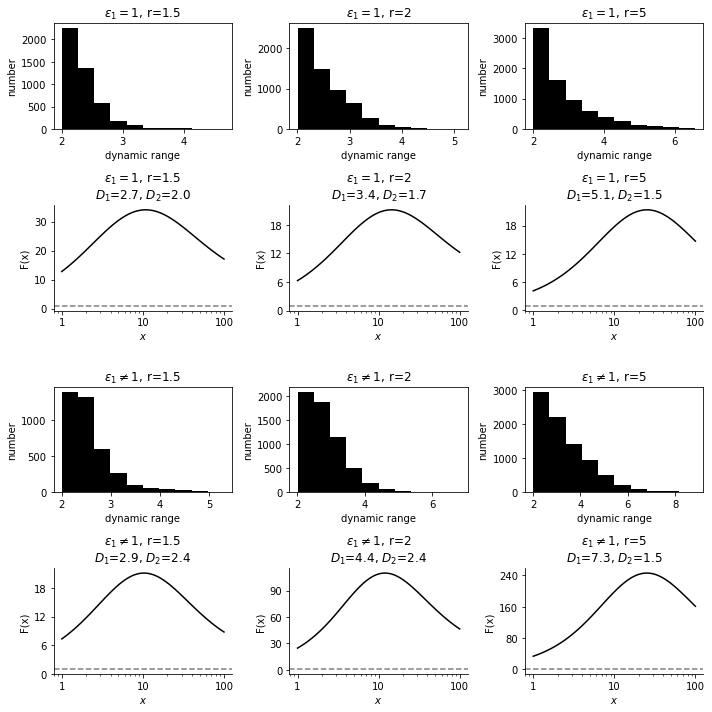

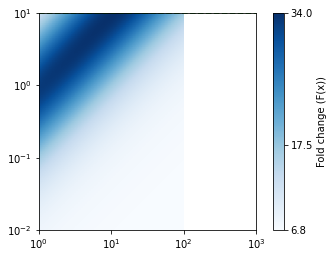

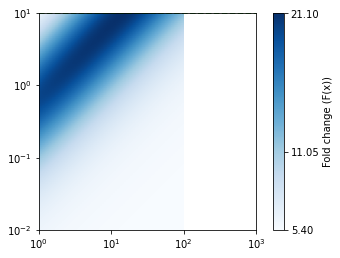

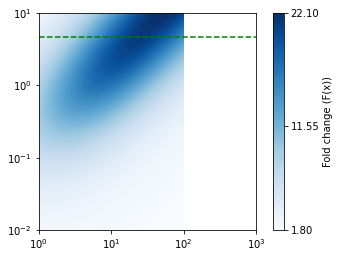

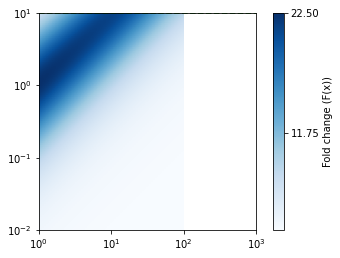

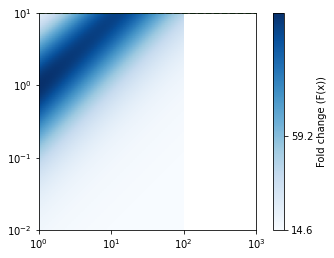

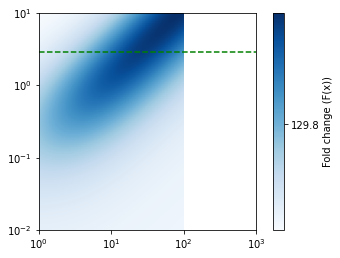

In [48]:
df1=pd.read_csv("2025_05_df_23.csv.gz",compression="gzip")
dfn1=pd.read_csv("2025_05_df_123.csv.gz",compression="gzip")
fig,axes=plt.subplots(4,3,figsize=(10,10))
for df_,df in enumerate([df1,dfn1]):
    for r,ratio in enumerate([1.5,2,5]):
        division=df["D1"].values/df["D2"].values
        mask=(division>1) & (division<ratio)
        ax=axes[2*df_][r]
        subdf=df[mask]
        dynamic_ranges=subdf["D1"]+subdf["D2"]
        argmax=np.argmax(dynamic_ranges)
        if df_==0:
            i=7
        else:
            i=8
        row=subdf.iloc[argmax]
        parameterset=row.values[0:i]
        D1=row["D1"]
        D2=row["D2"]
        

        ax.hist(dynamic_ranges,color="k")
        ax.set_xlabel("dynamic range")
        ax.set_ylabel("number")
        if df_==0:
            ax.set_title(r"$\epsilon_1 = 1$, r=%g"%ratio)
            ax=axes[2*df_+1][r]
            ax.set_title("$\epsilon_1 = 1$, r=%g\n$D_1$=%2.1f, $D_2$=%2.1f"%(ratio,D1,D2))
            case="23"
            
        else:
            ax.set_title(r"$\epsilon_1 \neq 1$, r=%g"%ratio)
            ax=axes[2*df_+1][r]
            ax.set_title(r"$\epsilon_1 \neq 1$, r=%.2g" "\n" r"$D_1$=%.1f, $D_2$=%.1f" % (ratio, D1, D2))
            case="123"
        plot_parset_heatmap_and_line(parameterset,ax_line=ax,case=case)
fig.tight_layout()
fig.savefig("./figscode/FigSdynamicranges.pdf")
plt.show()